In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

os.chdir('/Users/bebr1814/projects/chuong_bees/analysis/SNPs')

In [2]:
vcfs = glob.glob('/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/*.sorted.vcf.gz')

test_vcf = vcfs[0]

def read_vcf(vcf_file):
	"""
	Read a vcf.gz file and return a dataframe with the relevant information.
	"""

	# Read the vcf file
	dv = pd.read_csv(vcf_file, sep='\t', compression='gzip', comment='#', header=None)

	# Extract the relevant columns
	dv.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT'] + [f'GT_{i}' for i in range(1, len(dv.columns) - 8)]
	
	# Extract the sample names from the FORMAT column
	sample_names = dv['FORMAT'].str.split(':').str[0].unique()
	
	return dv

# dv = read_vcf(test_vcf)
# dv

vcf_df = pd.DataFrame()
for vcf in vcfs:
	print(vcf)
	dv = read_vcf(vcf)
	sample = vcf.split('/')[-1].split('.')[0]
	dv['region'] = sample[:-1]
	dv['Sample'] = sample
	vcf_df = pd.concat([vcf_df, dv], ignore_index=True)

/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/florida3.barcode2.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/thailand4.barcode5.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/tokyo3.barcode7.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/florida4.barcode3.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/florida2.barcode1.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/thailand1.barcode12.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/tokyo2.barcode6.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/deepvariant_outputs/tokyo1.barcode11.sorted.vcf.gz
/Users/bebr1814/projects/chuong_bees/CL_Shared/data/bee_rotation/d

In [3]:
genes = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2/genomic.gtf', sep='\t', comment='#', header=None)
genes.columns = ['chrom', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

# genes = genes[genes['feature'] == 'gene']

# expand the attribute column to get more info
# for i in ['gene_id', 'transcript_id', 'db_xref', 'exception', 'gene', 'inference', 'note', 'product', 'transcript_biotype', 'exon_number']:
# 	genes[i] = genes['attribute'].str.extract(f'{i} "(.*?)"')[0]

In [4]:
genes[genes['attribute'].str.contains('Vg')]['attribute'].values[0]

'gene_id "Vg"; transcript_id ""; db_xref "BEEBASE:GB49544"; db_xref "GeneID:406088"; description "vitellogenin"; gbkey "Gene"; gene "Vg"; gene_biotype "protein_coding"; '

In [5]:
# # 'gene_id "Vg"; transcript_id ""; db_xref "BEEBASE:GB49544"; db_xref "GeneID:406088"; description "vitellogenin"; gbkey "Gene"; gene "Vg"; gene_biotype "protein_coding"; '
target_gene = 'GeneID:406088'

# # # Top hit by SVs
# target_gene = 'LOC102656661'

target_gene_df = genes[genes['attribute'].str.contains(target_gene)]
target_gene_df

,chrom,source,feature,start,end,score,strand,frame,attribute
177074,NC_037641.1,BestRefSeq,gene,5029485,5035661,.,-,.,"gene_id ""Vg""; transcript_id """"; db_xref ""BEEBA..."
177075,NC_037641.1,BestRefSeq,transcript,5029485,5035661,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177076,NC_037641.1,BestRefSeq,exon,5035607,5035661,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177077,NC_037641.1,BestRefSeq,exon,5034551,5035269,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177078,NC_037641.1,BestRefSeq,exon,5033503,5034402,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177079,NC_037641.1,BestRefSeq,exon,5032378,5033425,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177080,NC_037641.1,BestRefSeq,exon,5030657,5032282,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177081,NC_037641.1,BestRefSeq,exon,5030161,5030591,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177082,NC_037641.1,BestRefSeq,exon,5029485,5030098,.,-,.,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."
177083,NC_037641.1,BestRefSeq,CDS,5035607,5035637,.,-,0,"gene_id ""Vg""; transcript_id ""NM_001011578.1""; ..."


In [6]:
[c for c in vcf_df['CHROM'].unique() if c.startswith('NC_')]

['NC_037638.1',
 'NC_037639.1',
 'NC_037640.1',
 'NC_037641.1',
 'NC_037642.1',
 'NC_037644.1',
 'NC_037645.1',
 'NC_037646.1',
 'NC_037647.1',
 'NC_037648.1',
 'NC_037649.1',
 'NC_037650.1',
 'NC_037651.1',
 'NC_037652.1',
 'NC_037653.1',
 'NC_001566.1']

,chrom,source,feature,start,end,score,strand,frame,attribute
177074,NC_037641.1,BestRefSeq,gene,5029485,5035661,.,-,.,"gene_id ""Vg""; transcript_id """"; db_xref ""BEEBA..."


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GT_1,region,Sample
1212994,NC_037641.1,5029510,.,T,C,77.6,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"1/1:53:29:0,29:1:small_model:92,52,0",florida,florida3
1212995,NC_037641.1,5029515,.,G,A,0.0,RefCall,.,GT:GQ:DP:AD:VAF:MID:PL,"0/0:38:33:30,3:0.0909091:small_model:0,38,59",florida,florida3
1212996,NC_037641.1,5029703,.,A,G,69.2,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"1/1:47:29:0,29:1:small_model:71,46,0",florida,florida3
1212997,NC_037641.1,5029760,.,A,G,32.0,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"0/1:32:29:14,15:0.517241:small_model:32,0,56",florida,florida3
1212998,NC_037641.1,5029772,.,T,A,33.3,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"0/1:33:29:15,14:0.482759:small_model:33,0,59",florida,florida3
...,...,...,...,...,...,...,...,...,...,...,...,...
30348449,NC_037641.1,5035372,.,A,G,33.1,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"0/1:33:17:12,5:0.294118:small_model:33,0,68",florida,florida1
30348450,NC_037641.1,5035415,.,G,A,35.4,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"0/1:35:19:12,7:0.368421:small_model:35,0,67",florida,florida1
30348451,NC_037641.1,5035550,.,T,TA,28.2,PASS,.,GT:GQ:DP:AD:VAF:PL,"0/1:28:18:11,7:0.388889:28,0,47",florida,florida1
30348452,NC_037641.1,5035567,.,T,C,24.4,PASS,.,GT:GQ:DP:AD:VAF:MID:PL,"0/1:24:19:11,8:0.421053:small_model:24,0,50",florida,florida1


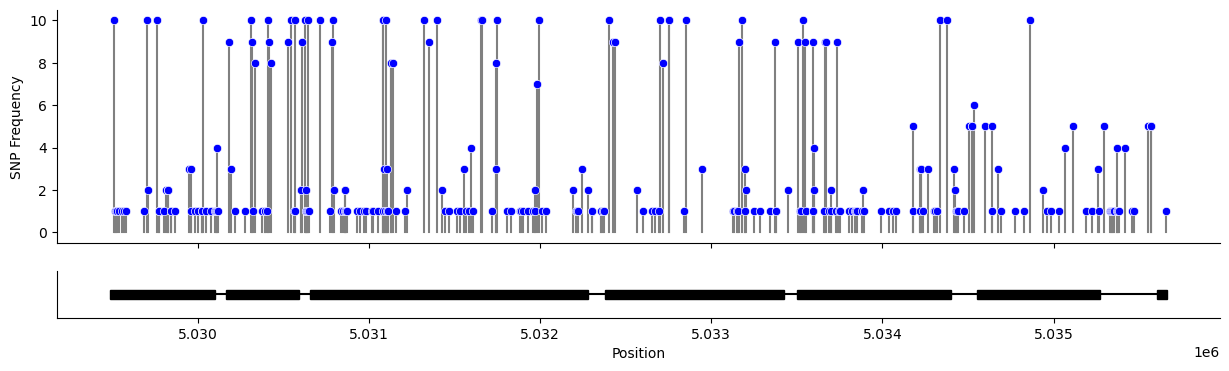

In [7]:
def lollipop_plot_with_introns(vcf_df,gene_df):
	# Get the variants that fall within the full gene region
	gene = gene_df[gene_df['feature'] == 'gene']
	vcfs = vcf_df[(vcf_df['CHROM'] == gene['chrom'].values[0]) & (vcf_df['POS'] >= gene['start'].values[0]) & (vcf_df['POS'] <= gene['end'].values[0])]
	display(gene)
	display(vcfs)

	# Transform to counts by position
	counts = vcfs.groupby(['POS']).count().reset_index()[['POS', 'ID']]
	# display(counts)

	# Plot the counts as lollipops (scatterplot with lines going down to the x-axis)
	# And beneath another small plot with the gene structure (exons as boxes, introns as lines)
	fig, ax = plt.subplots(2,1, figsize=(15, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.2]})
	# Plot the counts
	sns.scatterplot(data=counts, x='POS', y='ID', ax=ax[0], color='blue',zorder=99)
	for i,r in counts.iterrows():
		# add a line to the x-axis
		ax[0].plot([r['POS'],r['POS']],[0,r['ID']],color='grey',zorder=2)
	
	ax[0].set_ylabel('SNP Frequency')

	# Plot the exons and introns as lines and boxes
	# Plot the exons and introns as lines and boxes
	exons = gene_df[gene_df['feature'] == 'exon'].sort_values(by='start')

	# Plot exons as rectangles
	for _, row in exons.iterrows():
		ax[1].add_patch(plt.Rectangle((row['start'], 0.4), row['end'] - row['start'], 0.2, color='black'))

	# Plot introns as lines (gaps between exons)
	for i in range(len(exons) - 1):
		intron_start = exons.iloc[i]['end']
		intron_end = exons.iloc[i + 1]['start']
		ax[1].plot([intron_start, intron_end], [0.5, 0.5], color='black')
		

	# Set limits and labels for the bottom plot
	ax[1].set_ylim(0, 1)
	ax[1].set_yticks([])
	ax[1].set_xlabel('Position')

	sns.despine()


lollipop_plot_with_introns(vcf_df, target_gene_df)

Loading genome...
Extracting gene and CDS info...
Found 7 CDS entries for gene on NC_037641.1 (-)
Total CDS length: 5310 bases
Translating CDS to amino acids...
Translated sequence length: 1770 amino acids
Building base-to-AA position map...
Mapping VCF variants to AA positions...
Found 722 variant mappings.
Generating plot...
Done.


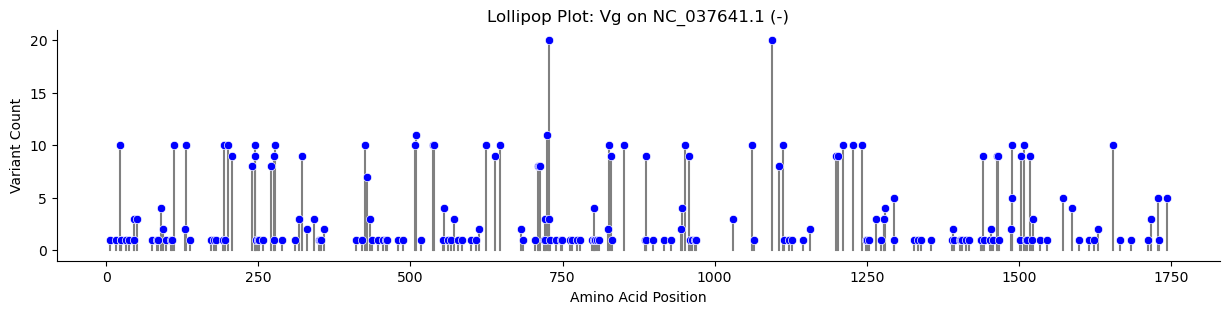

In [8]:
from Bio import SeqIO
from Bio.Seq import Seq

def lollipop_plot_translated(vcf_df, gene_df, genome_fasta):
    print("Loading genome...")
    genome = SeqIO.to_dict(SeqIO.parse(genome_fasta, "fasta"))

    print("Extracting gene and CDS info...")
    gene = gene_df[gene_df['feature'] == 'gene'].iloc[0]
    chrom = gene['chrom']
    strand = gene['strand']

    cds_df = gene_df[gene_df['feature'] == 'CDS'].sort_values(by='start', ascending=(strand == '+'))
    if cds_df.empty:
        print("No CDS features found. Cannot continue.")
        return

    print(f"Found {len(cds_df)} CDS entries for gene on {chrom} ({strand})")

    # Extract CDS sequence
    cds_seq = ""
    cds_coords = []
    for _, row in cds_df.iterrows():
        start = row['start'] - 1  # convert to 0-based
        end = row['end']
        seq = genome[chrom].seq[start:end]
        cds_seq += str(seq)
        cds_coords.append((start, end))

    if strand == '-':
        cds_seq = str(Seq(cds_seq).reverse_complement())
        cds_coords = cds_coords[::-1]

    print(f"Total CDS length: {len(cds_seq)} bases")
    if len(cds_seq) % 3 != 0:
        print("Warning: CDS length is not a multiple of 3. Skipping translation.")
        return

    print("Translating CDS to amino acids...")
    aa_seq = str(Seq(cds_seq).translate(to_stop=False))
    print(f"Translated sequence length: {len(aa_seq)} amino acids")

    print("Building base-to-AA position map...")
    base_to_aa = {}
    cds_pointer = 0  # position within current CDS block
    cds_block_index = 0
    aa_index = 0

    codon_buffer = []
    genomic_positions = []

    # Flatten CDS coordinates into one list of base positions with strand awareness
    all_bases = []
    for start, end in cds_coords:
        if strand == '+':
            all_bases.extend(range(start, end))
        else:
            all_bases.extend(range(end - 1, start - 1, -1))  # reverse

    for i, genomic_pos in enumerate(all_bases):
        codon_buffer.append(genomic_pos + 1)  # VCF is 1-based
        if len(codon_buffer) == 3:
            for pos in codon_buffer:
                base_to_aa[pos] = aa_index
            codon_buffer = []
            aa_index += 1


    print("Mapping VCF variants to AA positions...")
    vcfs = vcf_df[(vcf_df['CHROM'] == gene['chrom']) & (vcf_df['POS'] >= gene['start']) & (vcf_df['POS'] <= gene['end'])]

    aa_variants = []
    for _, row in vcfs.iterrows():
        pos = row['POS']
        if pos in base_to_aa:
            aa_variants.append(base_to_aa[pos])
    if not aa_variants:
        print("No variants map to amino acid positions in CDS.")
        return

    print(f"Found {len(aa_variants)} variant mappings.")

    counts_df = pd.Series(aa_variants).value_counts().sort_index().reset_index()
    counts_df.columns = ['AA_POS', 'COUNT']

    print("Generating plot...")
    fig, ax = plt.subplots(figsize=(15, 3))
    sns.scatterplot(data=counts_df, x='AA_POS', y='COUNT', ax=ax, color='blue', zorder=99)
    for _, row in counts_df.iterrows():
        ax.plot([row['AA_POS'], row['AA_POS']], [0, row['COUNT']], color='grey', zorder=2)

    ax.set_xlabel('Amino Acid Position')
    ax.set_ylabel('Variant Count')
    ax.set_title(f"Lollipop Plot: {gene['attribute'].split(';')[0].split('"')[1]} on {chrom} ({strand})")
    sns.despine()
    print("Done.")


# Example usage
genome = '/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2/GCF_003254395.2_Amel_HAv3.1_genomic.fna'
lollipop_plot_translated(vcf_df, target_gene_df, genome)

In [9]:
from Bio.Seq import Seq
from tqdm import tqdm

def classify_cds_variants(vcf_df, cds_seq, cds_coords, strand):
    print("Flattening CDS genomic positions...")
    # Create a flat list of genomic positions in CDS order
    cds_positions = []
    for start, end in cds_coords:
        if strand == '+':
            cds_positions.extend(range(start, end))
        else:
            cds_positions.extend(range(end - 1, start - 1, -1))

    pos_to_cds_index = {pos + 1: i for i, pos in enumerate(cds_positions)}  # VCF POS is 1-based

    classifications = []

    for i, row in tqdm(vcf_df.iterrows()):
        pos = row['POS']
        ref = row['REF']
        alt = row['ALT']

        if len(ref) != 1 or len(alt) != 1:
            # Skip non-SNPs for now
            classifications.append("non-SNP")
            continue

        if pos not in pos_to_cds_index:
            classifications.append("non-coding")
            continue

        cds_index = pos_to_cds_index[pos]
        codon_index = cds_index // 3
        codon_start = codon_index * 3
        codon_end = codon_start + 3

        if codon_end > len(cds_seq):
            classifications.append("out-of-bounds")
            continue

        original_codon = str(cds_seq[codon_start:codon_end])

        codon_list = list(original_codon)
        within_codon_index = cds_index % 3
        codon_list[within_codon_index] = alt
        new_codon = ''.join(codon_list)

        if strand == '-':
            original_codon = str(Seq(original_codon).reverse_complement())
            new_codon = str(Seq(new_codon).reverse_complement())

        orig_aa = str(Seq(original_codon).translate())
        new_aa = str(Seq(new_codon).translate())

        if orig_aa == new_aa:
            classifications.append("synonymous")
        elif new_aa == '*':
            classifications.append("nonsense")
        else:
            classifications.append("missense")

    vcf_df['effect'] = classifications
    return vcf_df


In [51]:
def lollipop_plot_translated_by_type(vcf_df, gene_df, genome_fasta):
    print("Loading genome...")
    genome = SeqIO.to_dict(SeqIO.parse(genome_fasta, "fasta"))

    print("Extracting gene and CDS info...")
    gene = gene_df[gene_df['feature'] == 'gene'].iloc[0]
    chrom = gene['chrom']
    strand = gene['strand']

    cds_df = gene_df[gene_df['feature'] == 'CDS'].sort_values(by='start', ascending=(strand == '+'))
    if cds_df.empty:
        print("No CDS features found. Cannot continue.")
        return

    print(f"Found {len(cds_df)} CDS entries for gene on {chrom} ({strand})")

    # Extract CDS sequence and record coordinates
    cds_seq = ""
    cds_coords = []
    for _, row in cds_df.iterrows():
        start = row['start'] - 1  # 0-based
        end = row['end']
        seq = genome[chrom].seq[start:end]
        cds_seq += str(seq)
        cds_coords.append((start, end))

    if strand == '-':
        cds_seq = str(Seq(cds_seq).reverse_complement())
        cds_coords = cds_coords[::-1]

    print(f"Total CDS length: {len(cds_seq)} bases")
    if len(cds_seq) % 3 != 0:
        print("Warning: CDS length is not a multiple of 3. Skipping translation.")
        return

    print("Translating CDS to amino acids...")
    aa_seq = str(Seq(cds_seq).translate(to_stop=False))
    print(f"Translated sequence length: {len(aa_seq)} amino acids")

    print("Mapping genomic positions to amino acid positions...")
    base_to_aa = {}
    codon_buffer = []
    aa_index = 0
    all_bases = []
    for start, end in cds_coords:
        if strand == '+':
            all_bases.extend(range(start, end))
        else:
            all_bases.extend(range(end - 1, start - 1, -1))

    for genomic_pos in all_bases:
        codon_buffer.append(genomic_pos + 1)  # 1-based for VCF match
        if len(codon_buffer) == 3:
            for pos in codon_buffer:
                base_to_aa[pos] = aa_index
            codon_buffer = []
            aa_index += 1

    print("Subsetting variants to gene region...")
    vcfs = vcf_df[(vcf_df['CHROM'] == chrom) & 
                  (vcf_df['POS'] >= gene['start']) & 
                  (vcf_df['POS'] <= gene['end'])].copy()

    if vcfs.empty:
        print("No variants in gene region.")
        return

    print("Classifying variants...")
    vcfs = classify_cds_variants(vcfs, cds_seq, cds_coords, strand)

    if 'effect' not in vcfs.columns or vcfs['effect'].isna().all():
        print("No variants could be classified.")
        return

    print("Plotting per mutation type...")
    mutation_types = vcfs['effect'].dropna().unique()
    mutation_types = [mtype for mtype in mutation_types if mtype != 'non-coding']

    # assign colors to mutation types
    mutation_colors = {
        'synonymous': 'blue',
        'missense': 'orange',
        'nonsense': 'red',
        'non-SNP': 'grey'
    }

    n_types = len(mutation_types)
    print(f"Found {n_types} mutation types: {mutation_types}")
    fig, axes = plt.subplots(n_types, 1, figsize=(15, 1.5 * n_types), sharex=True)

    if n_types == 1:
        axes = [axes]  # ensure iterable

    mut_rates = {}

    for ax, mtype in zip(axes, mutation_types):
        subset = vcfs[vcfs['effect'] == mtype]
        aa_positions = [base_to_aa[pos] for pos in subset['POS'] if pos in base_to_aa]
        if not aa_positions:
            continue
        counts = pd.Series(aa_positions).value_counts().sort_index().reset_index()
        counts.columns = ['AA_POS', 'COUNT']

        color = mutation_colors[mtype]

        sns.scatterplot(data=counts, x='AA_POS', y='COUNT', ax=ax, color=color, zorder=99)
        for _, row in counts.iterrows():
            ax.plot([row['AA_POS'], row['AA_POS']], [0, row['COUNT']], color='grey', zorder=2)

        ax.set_ylabel(f"{mtype.capitalize()}")
        ax.set_title(mtype.capitalize())

        # Print the mutation rates of the gene for each type (normalized by length)
        mutation_rate = len(aa_positions) / len(cds_seq) * 100
        print(f"Mutation rate for {mtype}: {mutation_rate:.2f}%")
        ax.text(0.5, 0.9, f"Mut. rate: {mutation_rate:.2f}%", ha='center', va='center', transform=ax.transAxes, fontsize=10)
        mut_rates[mtype] = mutation_rate
    
    # make all y-axes the same
    max_count = max([ax.get_ylim()[1] for ax in axes])
    for ax in axes:
        ax.set_ylim(0, max_count)
        ax.set_yticks(range(0, int(max_count) + 1, max(1,int(max_count / 5))))
        ax.set_yticklabels(range(0, int(max_count) + 1, max(1,int(max_count / 5))))

    gene_name = gene['attribute'].split(';')[0].split('"')[1]
    axes[-1].set_xlabel('Amino Acid Position')
    fig.suptitle(f"Lollipop Plots by Mutation Type: {gene_name}", fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"{gene_name}.lollipop_SNP_plot_by_type.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"{gene_name}.lollipop_SNP_plot_by_type.pdf", dpi=300, bbox_inches='tight')

    return mut_rates

    print("Done.")


Loading genome...
Extracting gene and CDS info...
Found 7 CDS entries for gene on NC_037641.1 (-)
Total CDS length: 5310 bases
Translating CDS to amino acids...
Translated sequence length: 1770 amino acids
Mapping genomic positions to amino acid positions...
Subsetting variants to gene region...
Classifying variants...
Flattening CDS genomic positions...


861it [00:00, 6700.22it/s]

Plotting per mutation type...
Found 4 mutation types: ['missense', 'synonymous', 'non-SNP', 'nonsense']


Mutation rate for missense: 9.11%
Mutation rate for synonymous: 3.16%
Mutation rate for non-SNP: 0.87%
Mutation rate for nonsense: 0.45%
Done.


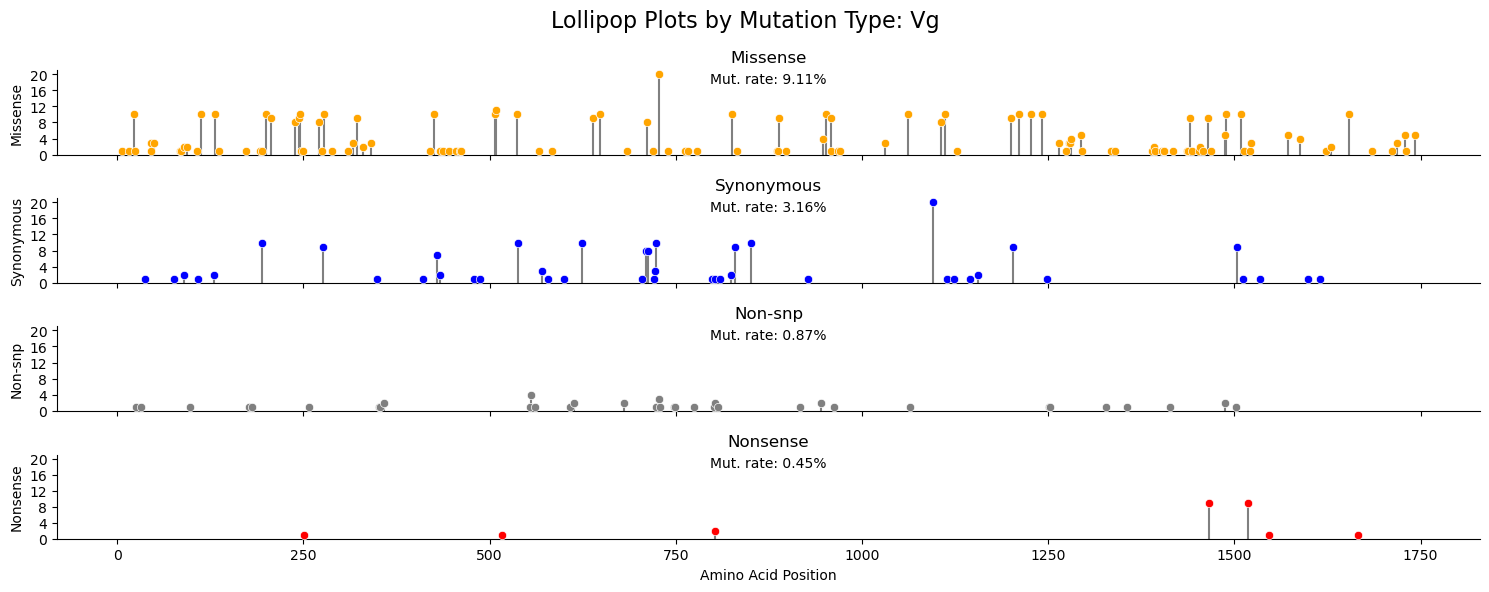

In [24]:

genome_fasta = '/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2/GCF_003254395.2_Amel_HAv3.1_genomic.fna'
lollipop_plot_translated_by_type(vcf_df, target_gene_df, genome_fasta)


Loading genome...
Extracting gene and CDS info...
Found 20 CDS entries for gene on NC_037645.1 (+)
Total CDS length: 7338 bases
Translating CDS to amino acids...
Translated sequence length: 2446 amino acids
Mapping genomic positions to amino acid positions...
Subsetting variants to gene region...
Classifying variants...
Flattening CDS genomic positions...


45982it [00:03, 11738.91it/s]


Plotting per mutation type...
Found 3 mutation types: ['non-SNP', 'missense', 'synonymous']
Mutation rate for non-SNP: 0.50%
Mutation rate for missense: 0.22%
Mutation rate for synonymous: 0.45%
Done.


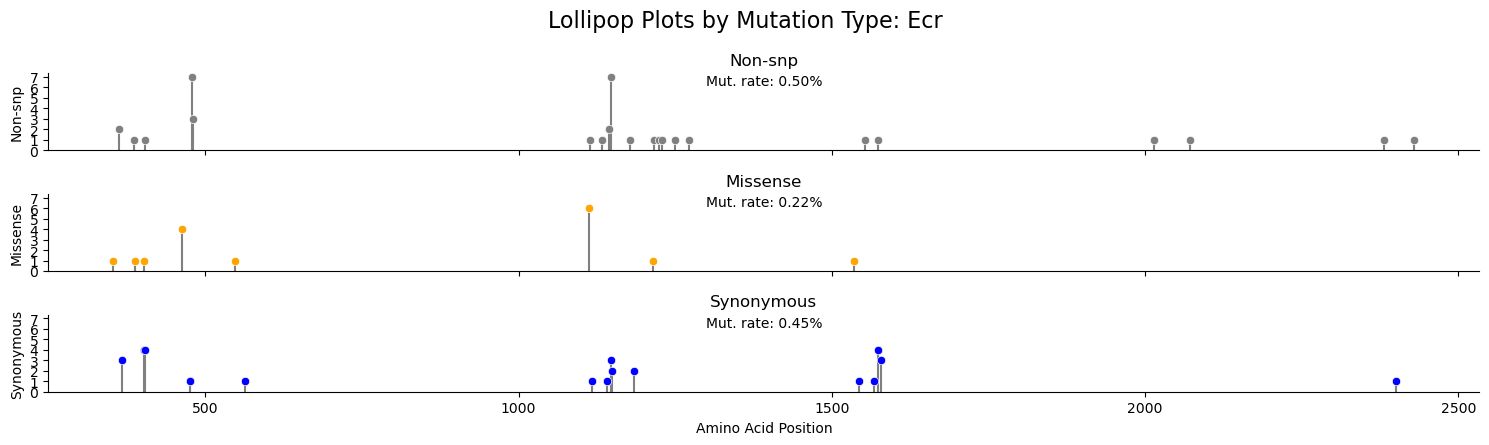

In [25]:
# ECR
lollipop_plot_translated_by_type(vcf_df, genes[genes['attribute'].str.contains('Ecr')], genome_fasta)

Loading genome...
Extracting gene and CDS info...
Found 4 CDS entries for gene on NC_037647.1 (-)
Total CDS length: 999 bases
Translating CDS to amino acids...
Translated sequence length: 333 amino acids
Mapping genomic positions to amino acid positions...
Subsetting variants to gene region...
Classifying variants...
Flattening CDS genomic positions...


205it [00:00, 10842.23it/s]

Plotting per mutation type...
Found 4 mutation types: ['non-SNP', 'synonymous', 'missense', 'nonsense']


Mutation rate for non-SNP: 1.10%
Mutation rate for synonymous: 0.20%
Mutation rate for missense: 0.40%
Mutation rate for nonsense: 0.20%
Done.


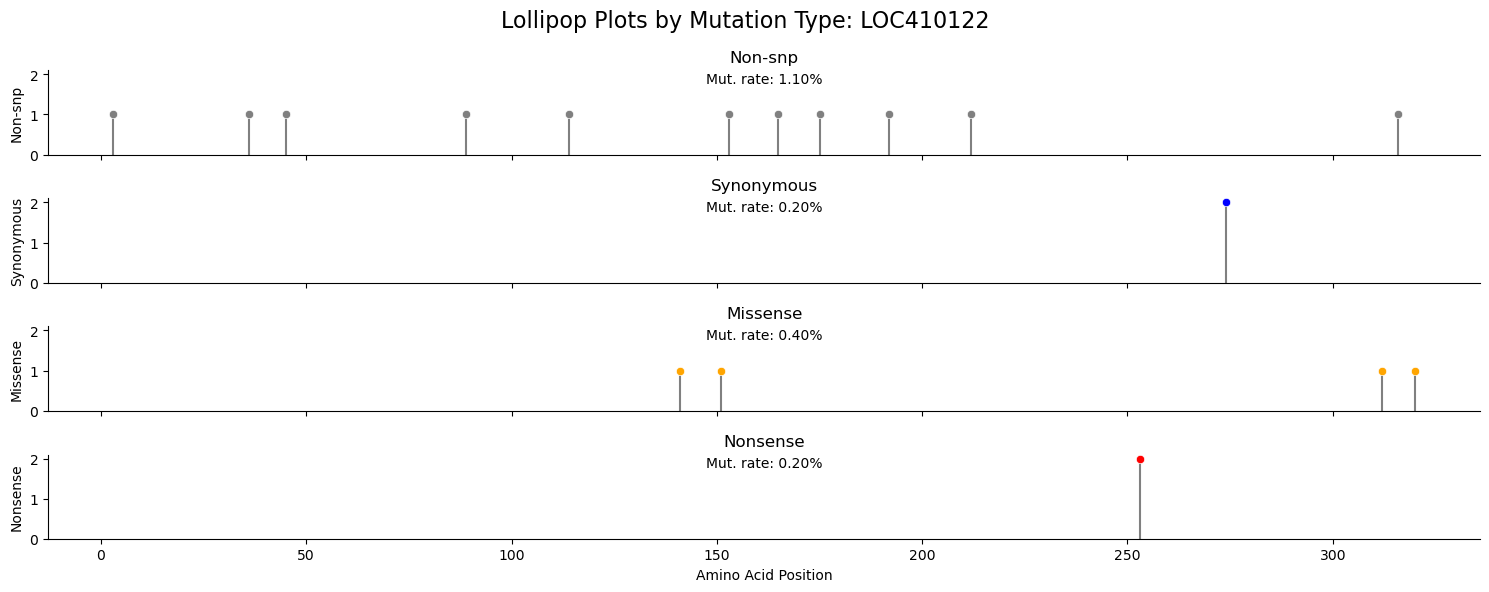

In [26]:
# GAPDH
lollipop_plot_translated_by_type(vcf_df, genes[genes['attribute'].str.contains('LOC410122')], genome_fasta)


In [ ]:
# https://docs.google.com/presentation/d/11g06wwPmmlF3hEPHwTZX45lfVoBb7ZVh2Ar-VjgDl4M/edit?slide=id.g349d524323e_0_45#slide=id.g349d524323e_0_45
key_genes = [
	'Vg',
	'Ecr',
	'LOC410122', # GAPDH
	'LOC102656661', # Varroa infection
	'E75', # Varroa infection
	'Obp6', # Varroa infection
	'Dscam', # Varroa infection
	'Dop3', # Varroa infection
	'Apid1', # Antimicrobial peptide
	'Def1', # Antimicrobial peptide
	'cact1', # Toll/Imd pathway
	'Imd', # Toll/Imd pathway
	'Pgrp-s2', # Toll/Imd pathway
]

mut_rates = pd.DataFrame(columns=['Gene Name','Missense Rate','Nonsense Rate','Synonymous Rate','Non-SNP Rate'])

for gene in key_genes:
	gene_df = genes[genes['attribute'].str.contains(gene)]
	if gene_df.empty:
		print(f"No gene found for {gene}")
		continue
	else:
		print(f"Found gene {gene} with {len(gene_df)} entries")
		mut_rates_dict = lollipop_plot_translated_by_type(vcf_df, gene_df, genome_fasta)

		mut_rates.loc[len(mut_rates)] = [gene, 0, 0, 0, 0]
		for mtype in mut_rates_dict.keys():
			if mtype == 'missense':
				mut_rates.loc[len(mut_rates)-1, 'Missense Rate'] = mut_rates_dict[mtype]
			elif mtype == 'nonsense':
				mut_rates.loc[len(mut_rates)-1, 'Nonsense Rate'] = mut_rates_dict[mtype]
			elif mtype == 'synonymous':
				mut_rates.loc[len(mut_rates)-1, 'Synonymous Rate'] = mut_rates_dict[mtype]
			elif mtype == 'non-SNP':
				mut_rates.loc[len(mut_rates)-1, 'Non-SNP Rate'] = mut_rates_dict[mtype]
			
mut_rates

Found gene Vg with 18 entries
Loading genome...
Extracting gene and CDS info...
Found 7 CDS entries for gene on NC_037641.1 (-)
Total CDS length: 5310 bases
Translating CDS to amino acids...
Translated sequence length: 1770 amino acids
Mapping genomic positions to amino acid positions...
Subsetting variants to gene region...
Classifying variants...
Flattening CDS genomic positions...


861it [00:00, 7009.97it/s]

Plotting per mutation type...
Found 4 mutation types: ['missense', 'synonymous', 'non-SNP', 'nonsense']


Mutation rate for missense: 9.11%
Mutation rate for synonymous: 3.16%
Mutation rate for non-SNP: 0.87%
Mutation rate for nonsense: 0.45%


/tmp/ipykernel_43052/2825842448.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.114877589453862' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mut_rates.loc[len(mut_rates)-1, 'Missense Rate'] = mut_rates_dict[mtype]
/tmp/ipykernel_43052/2825842448.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.1638418079096042' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mut_rates.loc[len(mut_rates)-1, 'Synonymous Rate'] = mut_rates_dict[mtype]
/tmp/ipykernel_43052/2825842448.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8662900188323917' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mut_rates.loc[len(mut_

Found gene Ecr with 55 entries
Loading genome...
Extracting gene and CDS info...
Found 20 CDS entries for gene on NC_037645.1 (+)
Total CDS length: 7338 bases
Translating CDS to amino acids...
Translated sequence length: 2446 amino acids
Mapping genomic positions to amino acid positions...
Subsetting variants to gene region...
Classifying variants...
Flattening CDS genomic positions...


45982it [00:03, 11795.36it/s]


Plotting per mutation type...
Found 3 mutation types: ['non-SNP', 'missense', 'synonymous']
Mutation rate for non-SNP: 0.50%
Mutation rate for missense: 0.22%
Mutation rate for synonymous: 0.45%


## Process mutation rates for key genes

In [42]:
mut_rates = pd.read_csv('/Users/bebr1814/projects/chuong_bees/analysis/SNPs/mutation_rates.csv')
mut_rates

,Gene Name,Gene ID,Missense Rate,Nonsense Rate,Synonymous Rate,Non-SNP Rate
0,Vitellogenin,Vg,0.0911,0.0045,0.0316,0.0087
1,Ecdysone receptor,Ecr,0.0022,0.0000,0.0045,0.0050
2,GAPDH,LOC410122,0.0040,0.0020,0.0020,0.0110


In [43]:
for col in ['Missense Rate','Nonsense Rate','Synonymous Rate','Non-SNP Rate']:
	mut_rates[col] = mut_rates[col]*100

mut_rates['Overall Rate'] = mut_rates[['Missense Rate','Nonsense Rate','Synonymous Rate','Non-SNP Rate']].sum(axis=1)

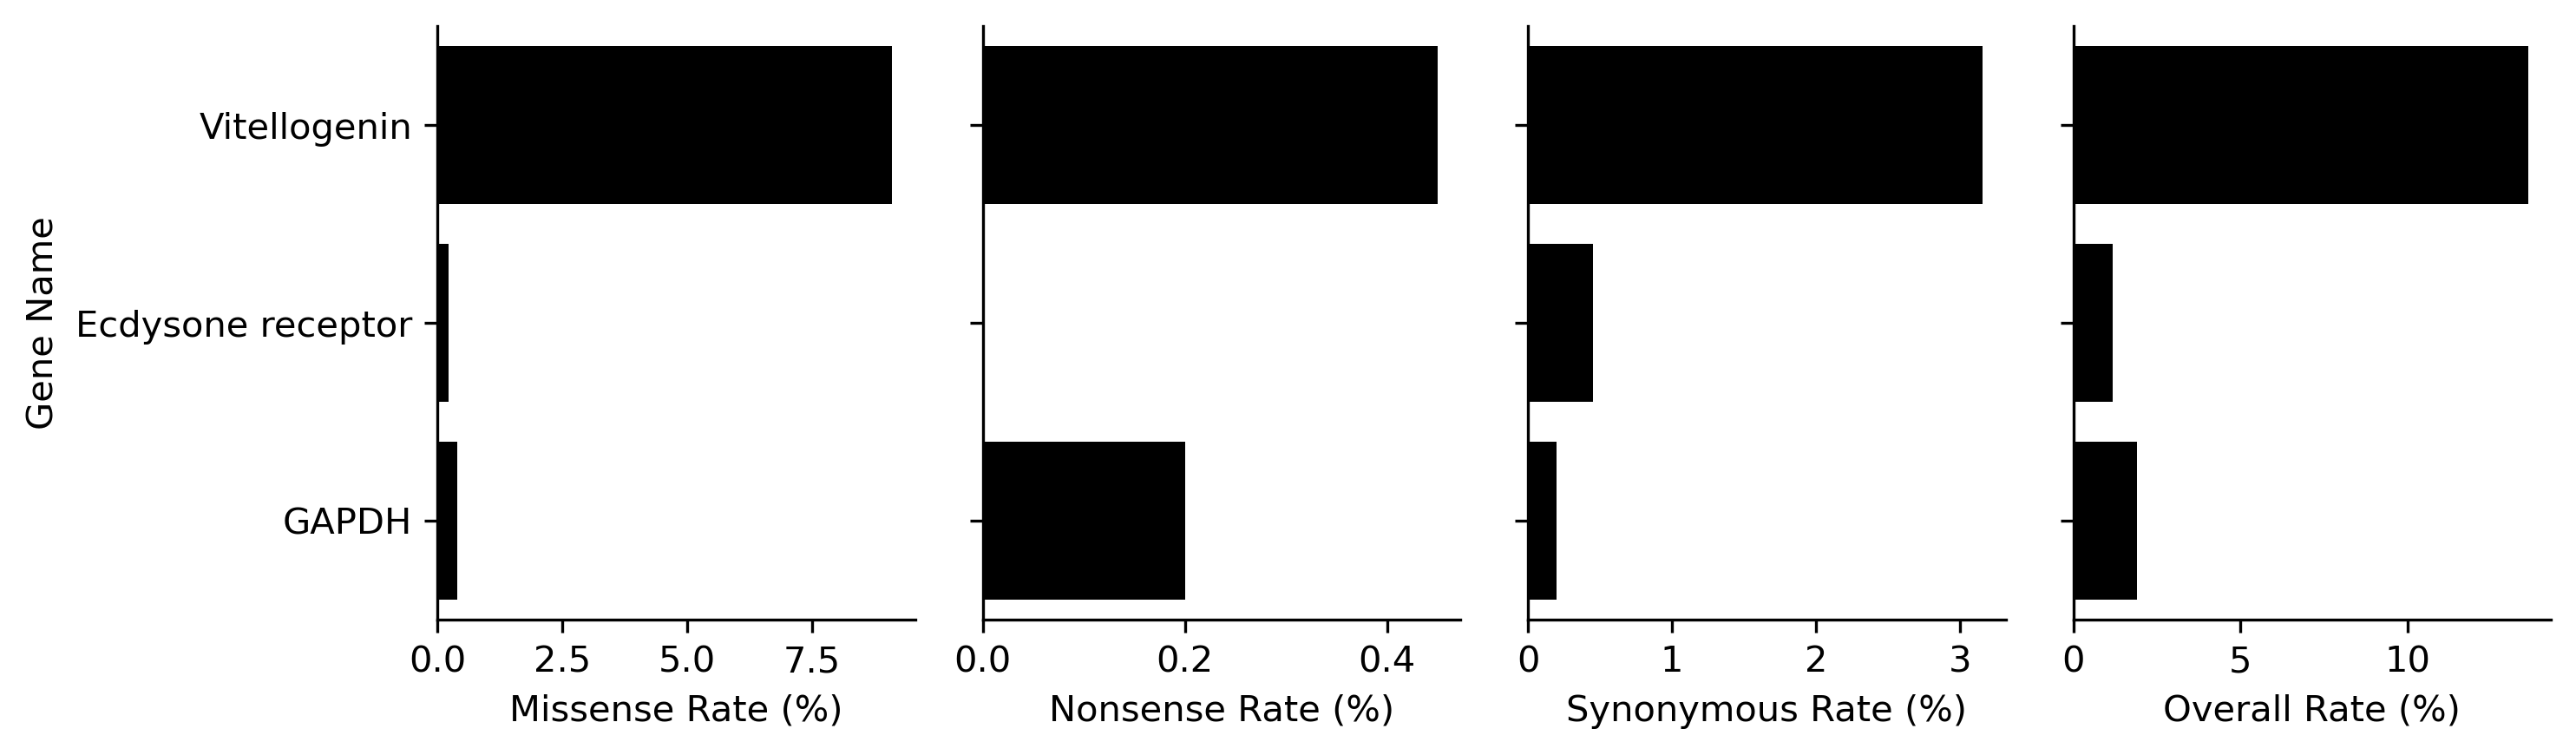

In [47]:
# Simple bar plots
fig, axes = plt.subplots(1,4,figsize=(10,3),dpi=300, sharex=False, sharey=True)
axes = axes.flatten()
for i, col in enumerate(['Missense Rate','Nonsense Rate','Synonymous Rate','Overall Rate']):
	ax = axes[i]
	sns.barplot(data=mut_rates, y='Gene Name', x=col, ax=ax, color='black')
	ax.set_xlabel(f'{col} (%)')

fig.tight_layout()
sns.despine()
plt.show()